In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
                  'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 
                   'income']

In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


<AxesSubplot:xlabel='income', ylabel='count'>

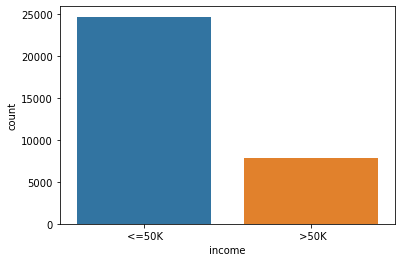

In [6]:
sns.countplot(x='income',data=df)

<AxesSubplot:xlabel='sex', ylabel='age'>

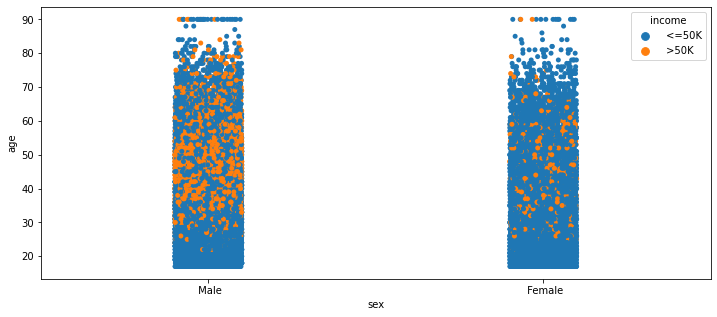

In [7]:
plt.figure(figsize=(12, 5))
sns.stripplot(x='sex',y='age',data=df,hue='income')

**we make a new column for income to work on by changing the datatype in the new column**

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
income1 = LabelEncoder()
df['income1'] = income1.fit_transform(df.income)

In [10]:
df[['income','income1']]

,income,income1
0,<=50K,0
1,<=50K,0
2,<=50K,0
3,<=50K,0
4,<=50K,0
...,...,...
32556,<=50K,0
32557,>50K,1
32558,<=50K,0
32559,<=50K,0


**so we notice that 0 prefer to <=50K and 1 prefer to >50K**

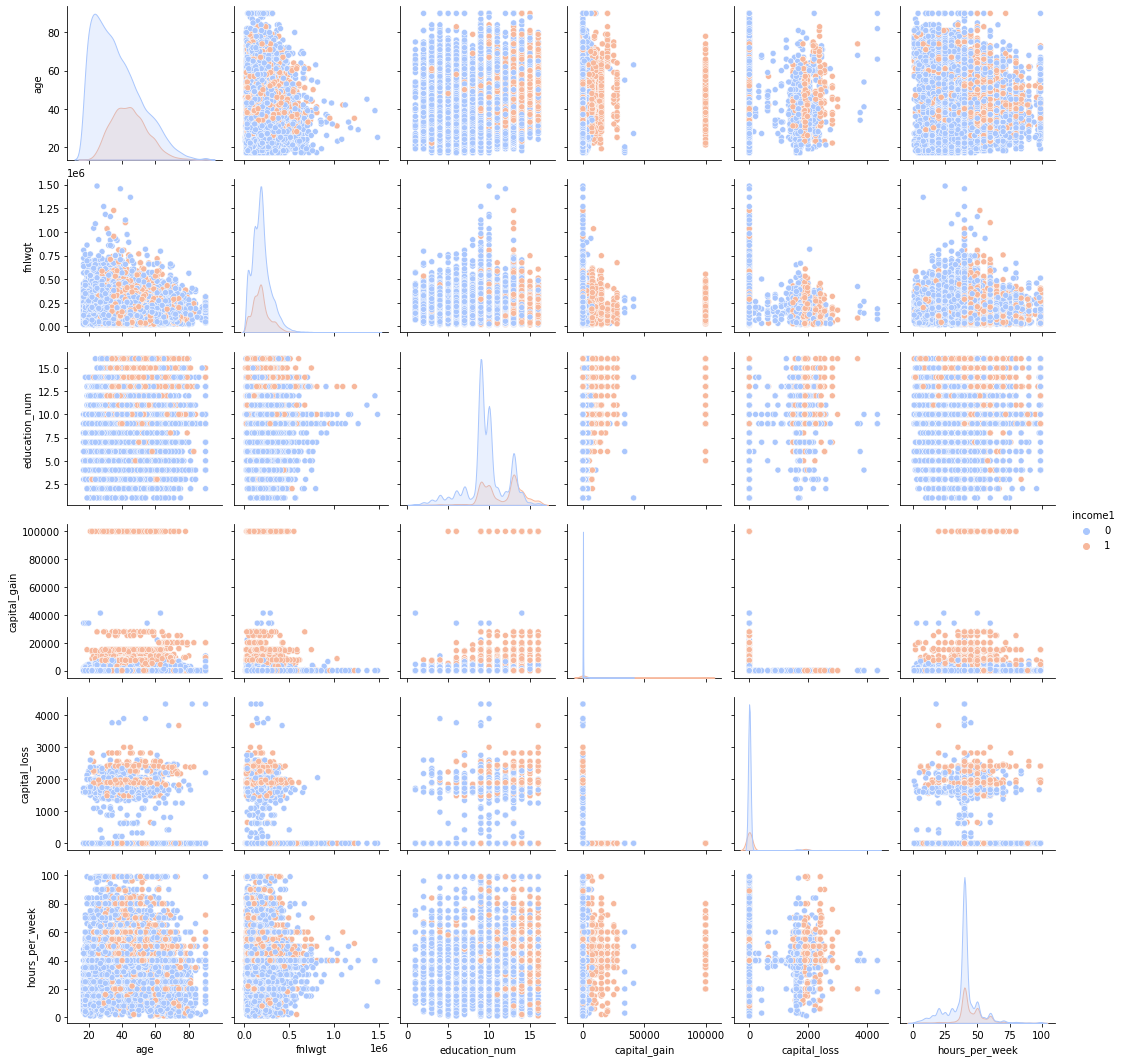

In [11]:
sns.pairplot(df,hue='income1',palette='coolwarm') 

In [12]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income1
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income1,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:>

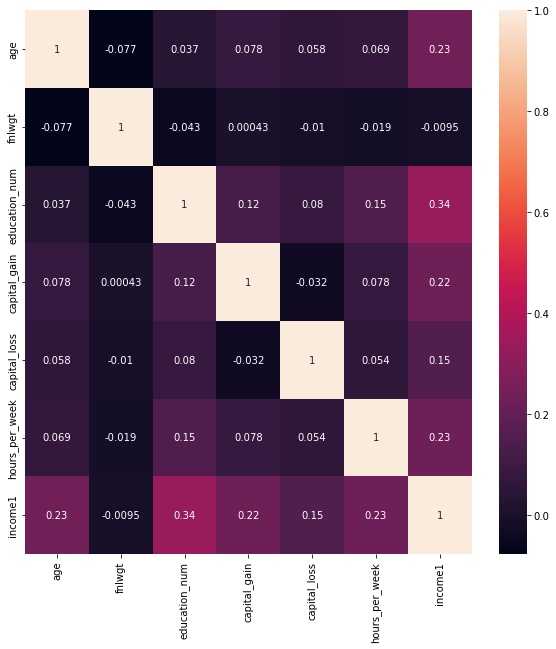

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='income', ylabel='education_num'>

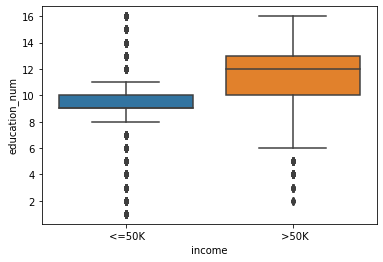

In [14]:
sns.boxplot(x='income',y='education_num',data=df)

<AxesSubplot:xlabel='income', ylabel='age'>

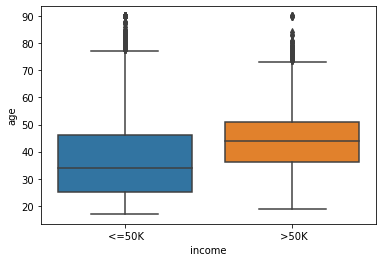

In [15]:
sns.boxplot(x='income',y='age',data=df)

In [16]:
df.groupby('income')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24720.0,36.783738,14.020088,17.0,25.0,34.0,46.0,90.0
>50K,7841.0,44.249841,10.519028,19.0,36.0,44.0,51.0,90.0


# Data Preprocessing

**Data cleaning**

* checking if there're missing values
* filling missing values if there are
* handling outliers
* removing irrelevant data

In [17]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
income1           0
dtype: int64

**now we check the features one by one and prepare them, we start with integers features**

In [18]:
df.corr()['income1']

age               0.234037
fnlwgt           -0.009463
education_num     0.335154
capital_gain      0.223329
capital_loss      0.150526
hours_per_week    0.229689
income1           1.000000
Name: income1, dtype: float64

In [19]:
df['fnlwgt'].value_counts()
#since the correlation is not that bad with this column we'll leave it but it may effect the prediction

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [20]:
df['capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64

In [21]:
df['capital_loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64

In [22]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [23]:
df['education_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [24]:
df['hours_per_week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours_per_week, Length: 94, dtype: int64

**now we prepare the categorical features and converting them to integers**

In [25]:
df['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [26]:
native_country1 = LabelEncoder()
df['native_country'] = native_country1.fit_transform(df.native_country)

In [27]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [28]:
occupation1 = LabelEncoder()
df['occupation'] = occupation1.fit_transform(df.occupation)

In [29]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [30]:
education1 = LabelEncoder()
df['education'] = education1.fit_transform(df.education)

In [31]:
df['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [32]:
marital_status1 = LabelEncoder()
df['marital_status'] = marital_status1.fit_transform(df.marital_status)

In [33]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [34]:
relationship1 = LabelEncoder()
df['relationship'] = relationship1.fit_transform(df.relationship)

In [35]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [36]:
workclass1 = LabelEncoder()
df['workclass'] = workclass1.fit_transform(df.workclass)

In [37]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [38]:
race1 = LabelEncoder()
df['race'] = race1.fit_transform(df.race)

In [39]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [40]:
sex1 = LabelEncoder()
df['sex'] = sex1.fit_transform(df.sex)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  int32 
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  int32 
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  int32 
 6   occupation      32561 non-null  int32 
 7   relationship    32561 non-null  int32 
 8   race            32561 non-null  int32 
 9   sex             32561 non-null  int32 
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  int32 
 14  income          32561 non-null  object
 15  income1         32561 non-null  int32 
dtypes: int32(9), int64(6), object(1)
memory usage: 2.9+ MB


# spliting

In [42]:
from sklearn.model_selection import train_test_split

we drop the income column, since its a duplicate of the income1 column. We'll use the income1 column since its already in 0s and 1s.

In [43]:
df = df.drop('income',axis=1)

In [44]:
X = df.drop('income1',axis=1).values
y = df['income1'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalizing

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model

In [48]:
from tensorflow.keras.models import Sequential

In [49]:
from tensorflow.keras.layers import Dense,Dropout

In [50]:
X_train.shape

(21815, 14)

In [51]:
model = Sequential()

model.add(Dense(14,activation='relu'))

model.add(Dense(7,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [52]:
model.fit(x=X_train,
          y=y_train,
          epochs=100,
          batch_size=256,
          validation_data=(X_test,y_test)
         )

Epoch 1/100
86/86 [==============================] - 3s 14ms/step - loss: 0.6117 - val_loss: 0.5467
Epoch 2/100
86/86 [==============================] - 1s 8ms/step - loss: 0.5347 - val_loss: 0.5091
Epoch 3/100
86/86 [==============================] - 1s 8ms/step - loss: 0.4942 - val_loss: 0.4615
Epoch 4/100
86/86 [==============================] - 1s 8ms/step - loss: 0.4523 - val_loss: 0.4297
Epoch 5/100
86/86 [==============================] - 1s 9ms/step - loss: 0.4281 - val_loss: 0.4112
Epoch 6/100
86/86 [==============================] - 1s 9ms/step - loss: 0.4099 - val_loss: 0.3950
Epoch 7/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3959 - val_loss: 0.3826
Epoch 8/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3860 - val_loss: 0.3715
Epoch 9/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3748 - val_loss: 0.3626
Epoch 10/100
86/86 [==============================] - 1s 9ms/step - loss: 0.3666 - val_loss: 0.3556
Epoch 11

86/86 [==============================] - 1s 7ms/step - loss: 0.3245 - val_loss: 0.3244
Epoch 84/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3249 - val_loss: 0.3238
Epoch 85/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3237 - val_loss: 0.3242
Epoch 86/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3243 - val_loss: 0.3235
Epoch 87/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3239 - val_loss: 0.3248
Epoch 88/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3234 - val_loss: 0.3236
Epoch 89/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3248 - val_loss: 0.3243
Epoch 90/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3239 - val_loss: 0.3233
Epoch 91/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3239 - val_loss: 0.3245
Epoch 92/100
86/86 [==============================] - 1s 8ms/step - loss: 0.3236 - val_loss: 0.3234
Epoch 93/100


In [53]:
model_loss = pd.DataFrame(model.history.history)

In [54]:
model_loss

,loss,val_loss
0,0.611677,0.546663
1,0.534740,0.509056
2,0.494211,0.461490
3,0.452295,0.429711
4,0.428059,0.411222
...,...,...
95,0.323770,0.323825
96,0.323971,0.323681
97,0.323497,0.323826
98,0.323081,0.322555


<AxesSubplot:>

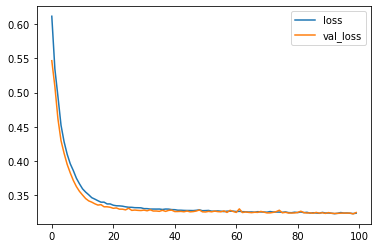

In [55]:
model_loss.plot()

**Create predictions from the X_test set**

In [56]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

336/336 [==============================] - 2s 4ms/step


In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      8196
           1       0.70      0.63      0.66      2550

    accuracy                           0.85     10746
   macro avg       0.79      0.77      0.78     10746
weighted avg       0.84      0.85      0.84     10746



In [59]:
df['income1'].value_counts()

0    24720
1     7841
Name: income1, dtype: int64

**0 prefer to <=50K and 1 prefer to >50K**

In [60]:
print(confusion_matrix(y_test,y_pred))

[[7504  692]
 [ 953 1597]]


**testing the model with a new customer from random data**

In [61]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('income1',axis=1).iloc[random_ind]
new_customer

age                   30
workclass              4
fnlwgt            366065
education             15
education_num         10
marital_status         4
occupation             3
relationship           4
race                   2
sex                    1
capital_gain           0
capital_loss           0
hours_per_week        40
native_country        39
Name: 19043, dtype: int64

In [62]:
y_pred = model.predict(new_customer.values.reshape(1,14))
y_pred = np.round(y_pred).astype(int)

1/1 [==============================] - 0s 192ms/step


In [63]:
df.iloc[random_ind]['income1']

0

**0 equal to <=50K**